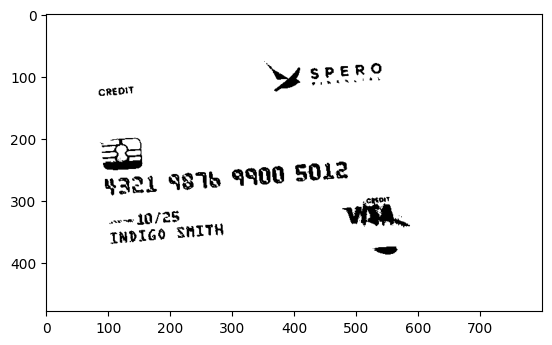

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# def is_histogram_in_white_region(image, threshold=220):
#     """Check if the entire histogram is concentrated in the white region."""
#     hist = cv2.calcHist([image], [0], None, [256], [0, 256])
#     total_pixels = np.sum(hist)
    
#     # Sum the frequencies of pixels in the white region
#     white_region_pixels = np.sum(hist[threshold:])
    
#     # If all pixels are in the white region, return True
#     return white_region_pixels / total_pixels >= 0.95  # 95% of pixels in white region

# def adjust_image_histogram(image):
#     """Adjust the histogram to center it in the middle."""
#     # Apply histogram equalization
#     adjusted_image = cv2.equalizeHist(image)
#     return adjusted_image

# def plot_histogram(image):
#     """Plot the histogram of the image."""
#     plt.hist(image.ravel(), bins=256, range=[0, 256])
#     plt.title('Histogram')
#     plt.xlabel('Pixel Intensity')
#     plt.ylabel('Frequency')
#     plt.show()



# # # Check if the histogram is in the white region
# # if is_histogram_in_white_region(image):
# #     print("Histogram is in the white region. Adjusting the histogram...")
# #     adjusted_image = adjust_image_histogram(image)
    
# #     # Display the adjusted image
# #     cv2.imshow('Adjusted Image', adjusted_image)
# #     cv2.waitKey(0)
# #     cv2.destroyAllWindows()

# #     # Plot the histogram of the adjusted image
# #     plot_histogram(adjusted_image)
# # else:
# #     print("Histogram is not in the white region.")

# #     # Plot the histogram of the original image
# #     plot_histogram(image)






# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def shift_histogram_to_middle(image):
#     """Shift the histogram of the image to the middle."""
#     # Calculate the current mean intensity of the image
#     mean_intensity = np.mean(image)
    
#     # Compute the shift required to move the mean to the middle (128)
#     shift_value = 128 - mean_intensity
    
#     # Apply the shift, ensuring values remain in the 0-255 range
#     shifted_image = np.clip(image + shift_value, 0, 255).astype(np.uint8)
    
#     return shifted_image

# def plot_histogram(image):
#     """Plot the histogram of the image."""
#     plt.hist(image.ravel(), bins=256, range=[0, 256])
#     plt.title('Histogram')
#     plt.xlabel('Pixel Intensity')
#     plt.ylabel('Frequency')
#     plt.show()

# # Load the image in grayscale
# # Load the image in grayscale
# image = cv2.imread('09 - El spero spathis we23et 3aaaa.jpg', cv2.IMREAD_GRAYSCALE)

# # Shift the histogram to the middle
# shifted_image = shift_histogram_to_middle(image)

# # Display the original and shifted images
# cv2.imshow('Original Image', image)
# cv2.imshow('Shifted Image', shifted_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# # Plot the histogram of the original and shifted images
# print("Original Image Histogram:")
# plot_histogram(image)

# print("Shifted Image Histogram:")
# plot_histogram(shifted_image)

# _, thresh = cv2.threshold(shifted_image, 120, 130, cv2.THRESH_BINARY)
# # Display the original and shifted images
# cv2.imshow('Original Image', image)
# cv2.imshow('Shifted Image', shifted_image)
# cv2.imshow('thresh Image', thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
image = cv2.imread('09 - El spero spathis we23et 3aaaa.jpg', cv2.IMREAD_GRAYSCALE)

_, thresh = cv2.threshold(image, 215, 255, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap="gray")